In [1]:
import matplotlib
matplotlib.use('nbagg')
# %matplotlib notebook
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
from scipy.signal import hilbert, chirp, spectrogram, periodogram

import sys
sys.path.append('/home/gaspar/git/pyha')

fs = 1e3
periods = 2
freq = 1

# Reference implementation

<IPython.core.display.Javascript object>


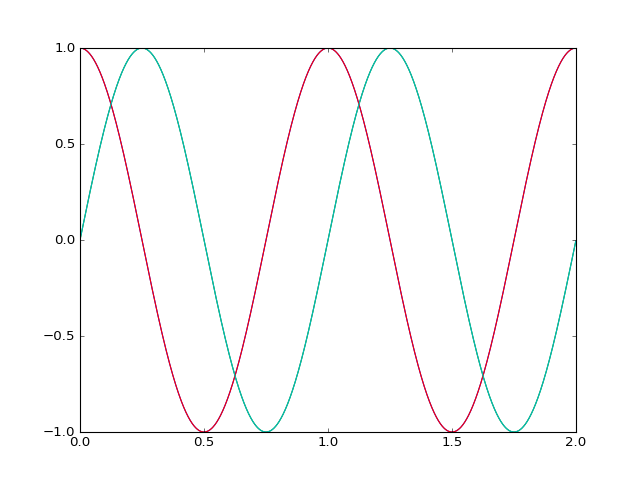

In [3]:
# phase_incremet = 2*np.pi*freq / fs
# time = np.arange(0, time_end*fs*phase_incremet, phase_incremet)
time = np.linspace(0, periods, fs*periods, endpoint=False) # NB! NOTICE ENDPOINT, TO MATCH GNURADIO

phase_angle = 2*np.pi*freq*time*1j
# print(phase_angle)
ref = np.exp(phase_angle)
# ref = np.exp(time*1j)
plt.plot(time, ref.real,time, ref.imag)
plt.show()

# CORDIC exp

INFO:pyha.simulation.simulation_interface:Running MODEL simulation!


<IPython.core.display.Javascript object>


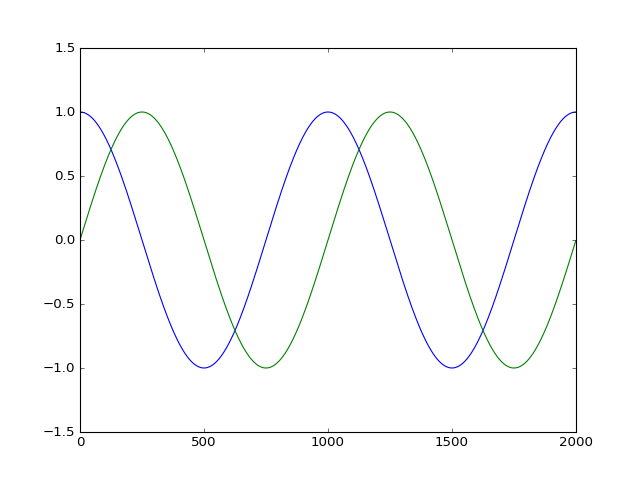

In [9]:
from pyha.common.sfix import ComplexSfix, Sfix
from pyha.components.cordic import Exp
from pyha.simulation.simulation_interface import SIM_HW_MODEL, Simulation, SIM_MODEL

phase_incremet = 2*np.pi*freq / fs


core = Exp()
sim = Simulation(SIM_MODEL, model=core, input_types=[Sfix(left=0, right=-17)])
i, q = sim.main(phase_angle.imag)

plt.plot(i)
plt.plot(q)
plt.show()
# plt.show()

# Compare

In [ ]:
np.testing.assert_almost_equal(res, ref, decimal=5)